In [4]:
suppressMessages(library(dplyr))
suppressMessages(library(verification))
suppressMessages(library(class))
library(tree)

In [14]:
#setwd('6to Semestre')
#setwd('Temas Selectos de Matemáticas')
#setwd('Covid')

#setwd("C:/Users/sole-/Documents/Tecnologia/Sexto semestre/Temas compu")
cv=read.csv("200606COVID19MEXICO.csv",header=T)

cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=1)%>%filter(as.numeric(UCI)<=2)

p = cv %>% filter(UCI == 2) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos en UCI
p = cv %>% filter(UCI == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos en UCI

cv_covid_negativo = cv %>% filter(UCI == 2) #numero de los que no necesitaron UCI(cuidado intensivos)
cv_covid_positivo = cv %>% filter(UCI == 1) #numero de los que necesitaron UCI(cuidado intensivos)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)

h = sample(1:dim(cv)[1],dim(cv)[1],replace = FALSE)
cv = cv %>% slice(h)
cv
#cv # 50% contagiados 50% no contagiados, escogidos al azar los no contagiados

#str(cv)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION )
cv$FECHA_INGRESO <- as.Date(cv$FECHA_INGRESO)
cv$FECHA_SINTOMAS <- as.Date(cv$FECHA_SINTOMAS)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION)
attach(cv)
#str(cv)
#summary(UCI)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]


FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>
2020-06-06,04d7a7,2,12,8,1,5,32,56,2,...,2,2,2,2,99,1,99,MÃ©xico,99,1
2020-06-06,15acc5,1,6,9,2,14,15,33,2,...,1,2,2,2,2,1,99,MÃ©xico,99,2
2020-06-06,0c3e95,1,4,25,2,25,25,18,2,...,2,2,1,2,99,1,99,MÃ©xico,99,2
2020-06-06,05a6df,2,9,21,2,21,21,114,2,...,2,1,1,98,99,1,99,MÃ©xico,99,1
2020-06-06,05f92b,2,8,9,2,9,15,92,2,...,1,2,2,2,1,1,99,MÃ©xico,99,2
2020-06-06,1562a8,2,12,8,2,10,8,37,2,...,2,2,1,2,99,1,99,MÃ©xico,99,1
2020-06-06,13e2c3,2,4,9,2,15,15,25,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
2020-06-06,0566e2,1,6,15,1,9,15,33,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
2020-06-06,135565,1,12,17,1,17,17,7,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2


The following objects are masked from cv (pos = 3):

    ASMA, CARDIOVASCULAR, DIABETES, EDAD, EMBARAZO, ENTIDAD_NAC,
    ENTIDAD_RES, ENTIDAD_UM, EPOC, FECHA_ACTUALIZACION, FECHA_DEF,
    FECHA_INGRESO, FECHA_SINTOMAS, HABLA_LENGUA_INDI,
    HABLA_LENGUA_INDIG, HIPERTENSION, ID_REGISTRO, INMUSUPR, INTUBADO,
    MIGRANTE, MUNICIPIO_RES, NACIONALIDAD, NEUMONIA, OBESIDAD, ORIGEN,
    OTRA_COM, OTRA_CON, OTRO_CASO, PAIS_NACIONALIDAD, PAIS_ORIGEN,
    RENAL_CRONICA, RESULTADO, SECTOR, SEXO, TABAQUISMO, TIPO_PACIENTE,
    UCI


Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = UCI ~ NEUMONIA + SEXO + EPOC + HIPERTENSION + INMUSUPR + 
    TABAQUISMO + CARDIOVASCULAR + DIABETES + ASMA + OBESIDAD + 
    RENAL_CRONICA + OTRO_CASO, family = "binomial", data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1205  -0.9268  -0.6996   1.0071   1.9169  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.34285    0.43953  -3.055  0.00225 ** 
NEUMONIA2         1.35873    0.09552  14.225  < 2e-16 ***
SEXO2            -0.19547    0.07799  -2.506  0.01220 *  
EPOC2            -0.15040    0.21767  -0.691  0.48960    
EPOC98            0.56147    1.31593   0.427  0.66962    
HIPERTENSION2     0.06578    0.08223   0.800  0.42377    
HIPERTENSION98    0.62414    1.09274   0.571  0.56789    
INMUSUPR2         0.61751    0.23769   2.598  0.00938 ** 
INMUSUPR98        0.34965    0.78233   0.447  0.65492    
TABAQUISMO2      -0.29753    0.13659  -2.178  0.02939 *  
TABAQUISMO98     -0.5997

[1] 0.53

[1] 0.665834

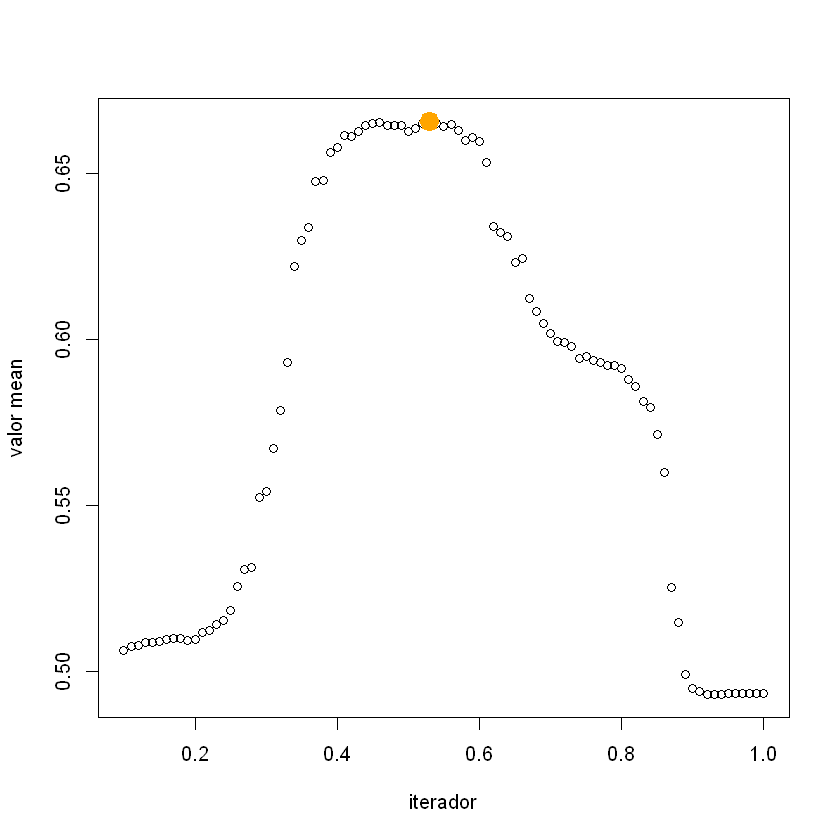

In [15]:
#########LOGISTIC####
glm1<- glm(UCI~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,family="binomial" ,data = Train)
summary(glm1)
yhat2<- predict(glm1, Test,type="response")

#para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
#se repite 91 veces 
size=1
val_mean <- rep(0,91)
for(i in seq(0.1,1,by=0.01)){
  y=as.integer(yhat2>i)
  y=ifelse(y =="0",1,2)
  val_mean[size]=mean(y == Test$UCI)
  size=size+1
}
size=2
lugar=1
mejor=val_mean[lugar]
for(i in seq(0.11,1,by=0.01)){
  if(val_mean[size]>mejor){
    mejor=val_mean[size]
    b=i
    lugar=size
  }
  size=size+1
}
y=seq(0.1,1,by=0.01)
plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
points(b, val_mean[lugar],  col = "orange", lwd = 10)
###valores
b
val_mean[lugar]


[1] 0.6633376

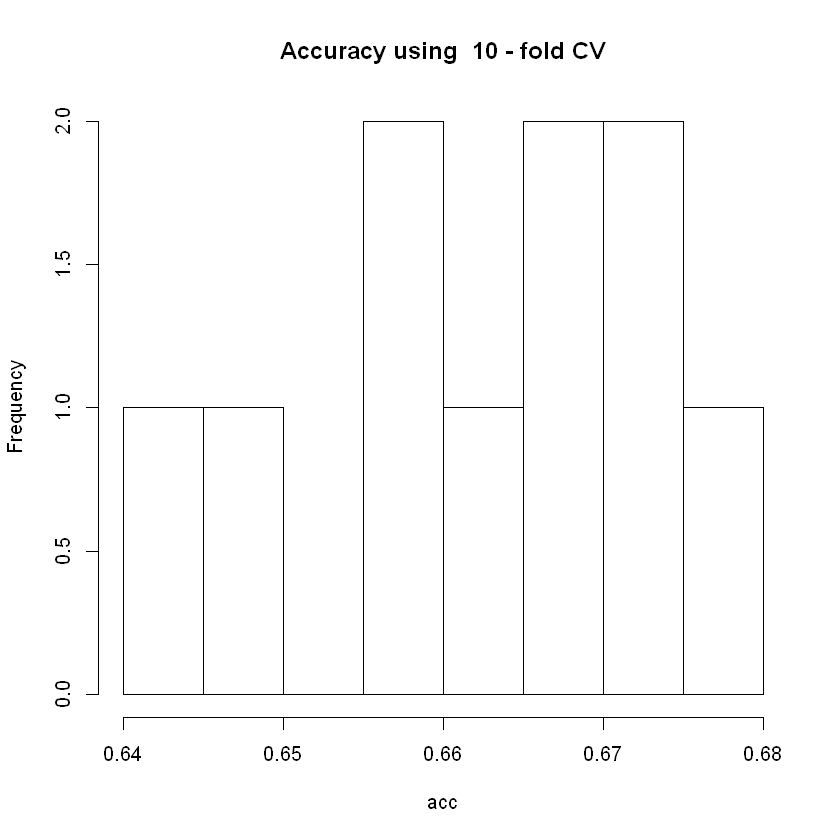

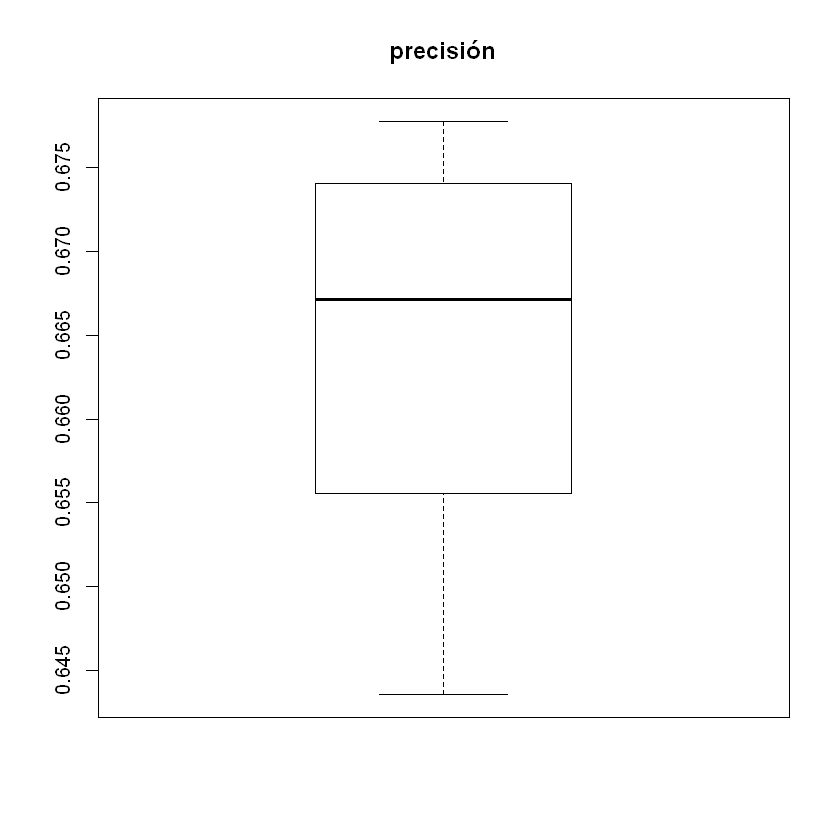

In [20]:

#################### k-folds glm
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = glm.c <- glm(UCI~ NEUMONIA+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+DIABETES+ASMA+OBESIDAD+OTRO_CASO,family="binomial" ,data = train)
  y=test$UCI
  yhat = predict(reg,test,type = "response")
  res = ifelse(yhat >b,2,1) #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo
hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="precisión")

In [21]:
lda1 <- lda(UCI~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,family="binomial" ,data = Train)
yhat1 <- predict(lda1, Test)$class

table(yhat1,Test$UCI)
mean(yhat1 == Test$UCI)

     
yhat1    1    2
    1 1286  720
    2  491 1106

[1] 0.6638912

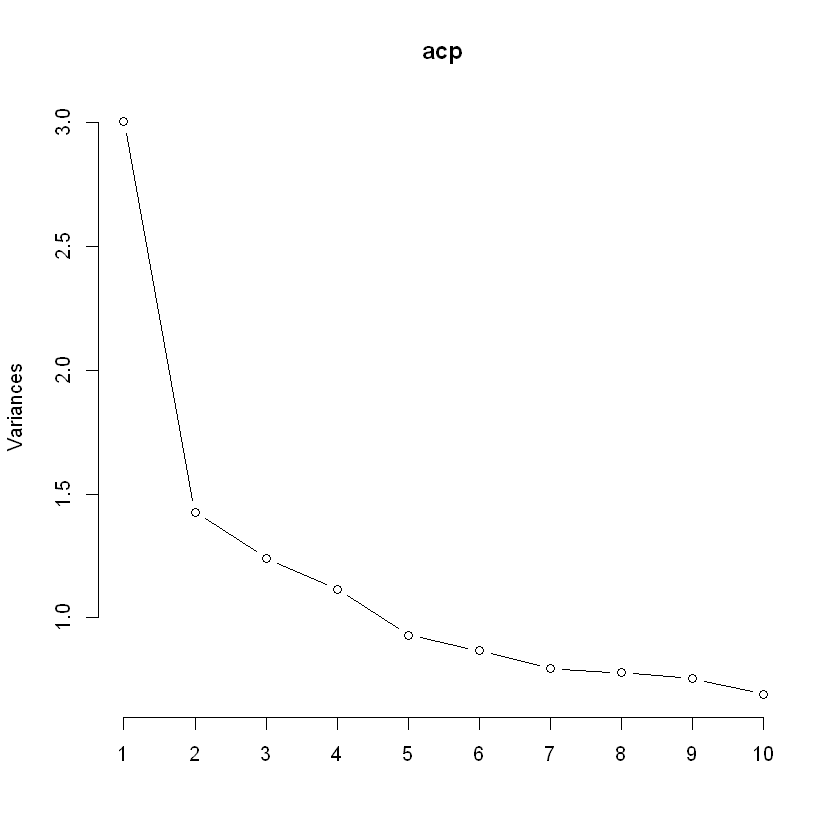

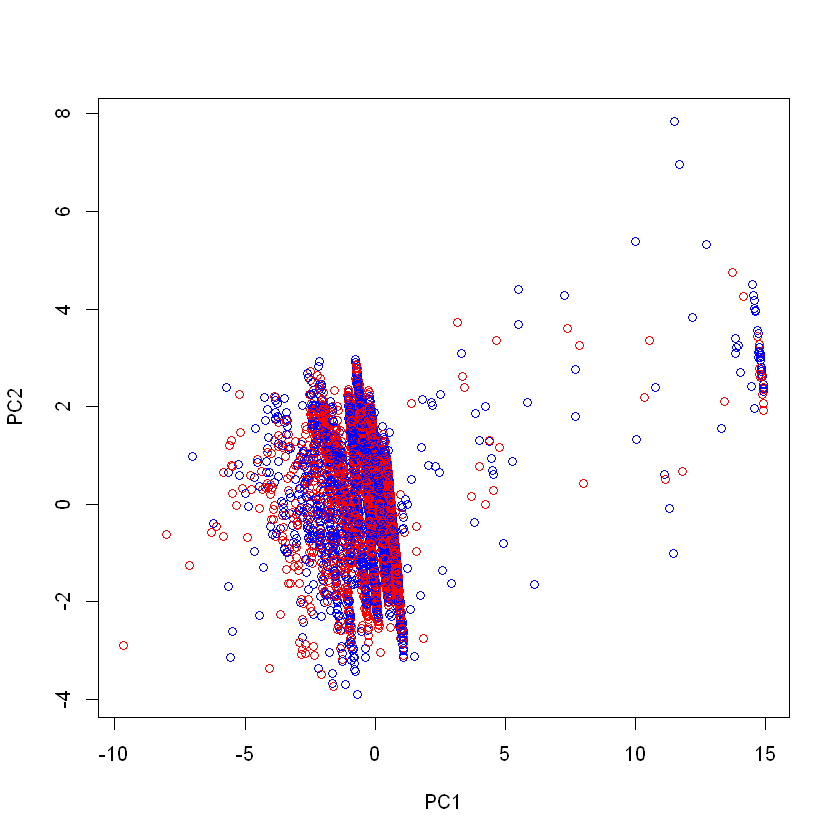

In [27]:
#####################3 PCA
covid = cv
UCI_list = covid$UCI
#def_list = covid$FECHA_DEF
def_list = covid$FECHA_DEF
covid <- as.data.frame(sapply(covid, as.numeric))
covid$FECHA_ACTUALIZACION <-NULL
covid$ID_REGISTRO <-NULL
covid$FECHA_INGRESO <-NULL
covid$FECHA_SINTOMAS <-NULL
covid$FECHA_DEF <- NULL
covid$PAIS_NACIONALIDAD <-NULL
covid$PAIS_ORIGEN <-NULL
covid$UCI <- NULL
covid$HABLA_LENGUA_INDIG <- NULL
covid$HABLA_LENGUA_INDI <- NULL
covid$MUNICIPIO_RES <- NULL
covid$MIGRANTE <- NULL
covid$ORIGEN <- NULL
covid$ENTIDAD_NAC <- NULL
covid$ENTIDAD_UM <- NULL
covid$ENTIDAD_RES <- NULL
covid$RESULTADO <- NULL
covid$SECTOR <- NULL
covid$OTRA_CON <- NULL
covid$TIPO_PACIENTE <- NULL
covid$NACIONALIDAD <- NULL
#covid$RENAL_CRONICA <- NULL
#covid$CARDIOVASCULAR <- NULL
covid$EMBARAZO <- NULL
#covid$TABAQUISMO <- NULL
covid$FECHA_DEF <- NULL
covid$INTUBADO <- NULL
#centrar las funcionalidades, usando el método prcm
acp <- prcomp(covid, center = TRUE, scale = TRUE) 
#normalizamos las variables, con center  cada variable sera restada de la media
#dividir por la desviación, estandarizamos las variables, para que no domine la varianza de uno
plot(acp, type = "l") 
plot(acp$x[,1],acp$x[,2],col=c("blue","red")[UCI_list],xlab="PC1",ylab="PC2")

[1] 0.6634759

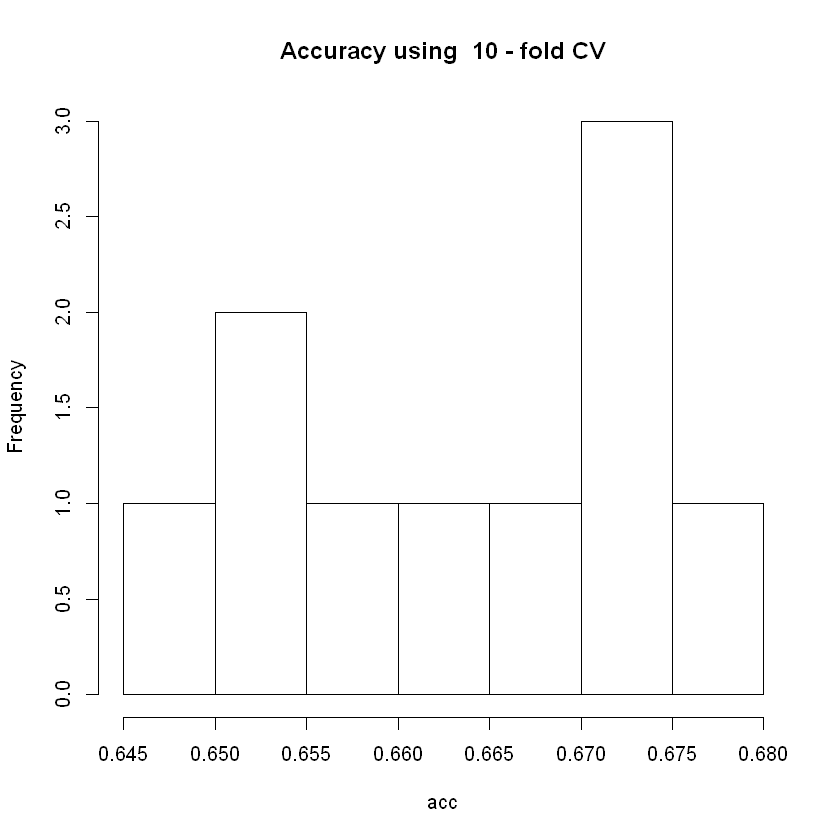

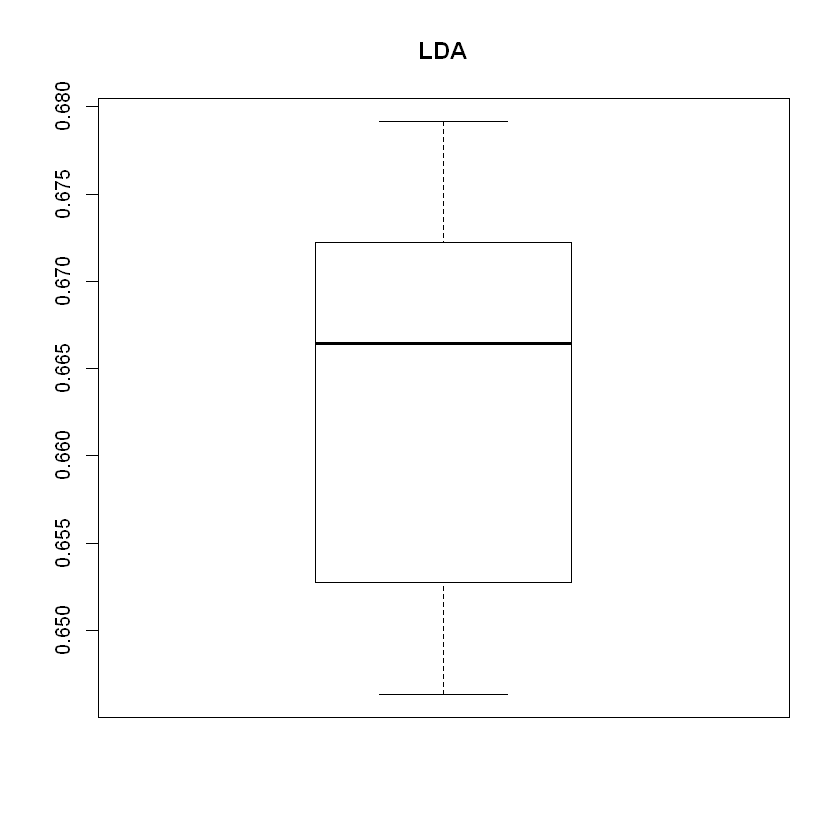

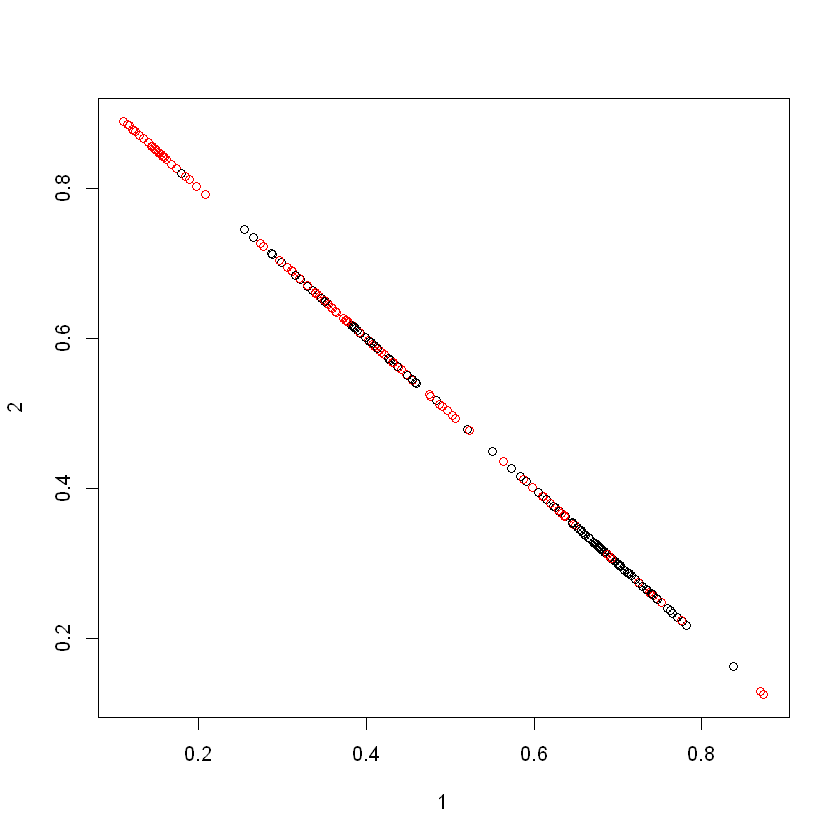

In [22]:
######kfolds lda
n <- dim(cv)[1]
k <- 10
folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = lda(UCI~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,family="binomial" ,data = train)
  
  y = test$UCI
  res = predict(reg, test)$class #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo
hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="LDA",xlabel="Precisión")
y = as.factor(test$UCI)
plot(predict(reg, test)$posterior,col=c(y))

[1] "la mejor k fue: "


[1] 4

[1] 0.6669442

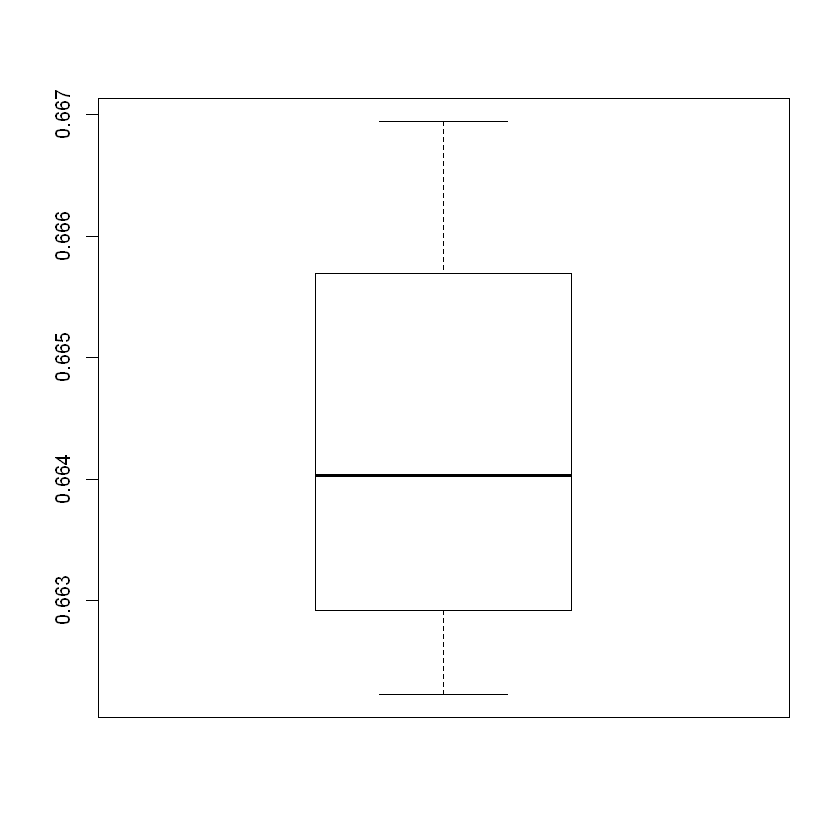

In [24]:
#############KNN#####
knn_val <- rep(1:20)
end= nrow(cv_covid_positivo)#numero de valores
mayor=0
for(n in 1:20){
  knn.pred <- knn(cbind(Train$NEUMONIA,Train$DIABETES,Train$CARDIOVASCULAR,Train$ASMA,
                        Train$OBESIDAD,Train$OTRO_CASO), 
                  cbind(Test$NEUMONIA,Test$DIABETES,Test$CARDIOVASCULAR,Test$ASMA,
                        Test$OBESIDAD,Test$OTRO_CASO), Train$UCI, k=n)
  error= mean(Test$UCI == knn.pred)
  knn_val[n]=error
  if(error>mayor){
    mayor=error
    k_best=n
  }
}
print("la mejor k fue: ")
k_best
mayor
boxplot(knn_val)


Classification tree:
tree(formula = UCI ~ NEUMONIA + SEXO + EPOC + HIPERTENSION + 
    INMUSUPR + TABAQUISMO + CARDIOVASCULAR + DIABETES + ASMA + 
    OBESIDAD + RENAL_CRONICA + OTRO_CASO, data = Train)
Variables actually used in tree construction:
[1] "NEUMONIA"  "OTRO_CASO"
Number of terminal nodes:  4 
Residual mean deviance:  1.231 = 4429 / 3599 
Misclassification error rate: 0.3397 = 1224 / 3603 

         
tree.pred    1    2
        1 1254  684
        2  523 1142

[1] 0.6650014

[1] "size"   "dev"    "k"      "method"

$size
[1] 4 3 2 1

$dev
[1] 1224 1224 1363 1740

$k
[1] -Inf    0  113  440

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

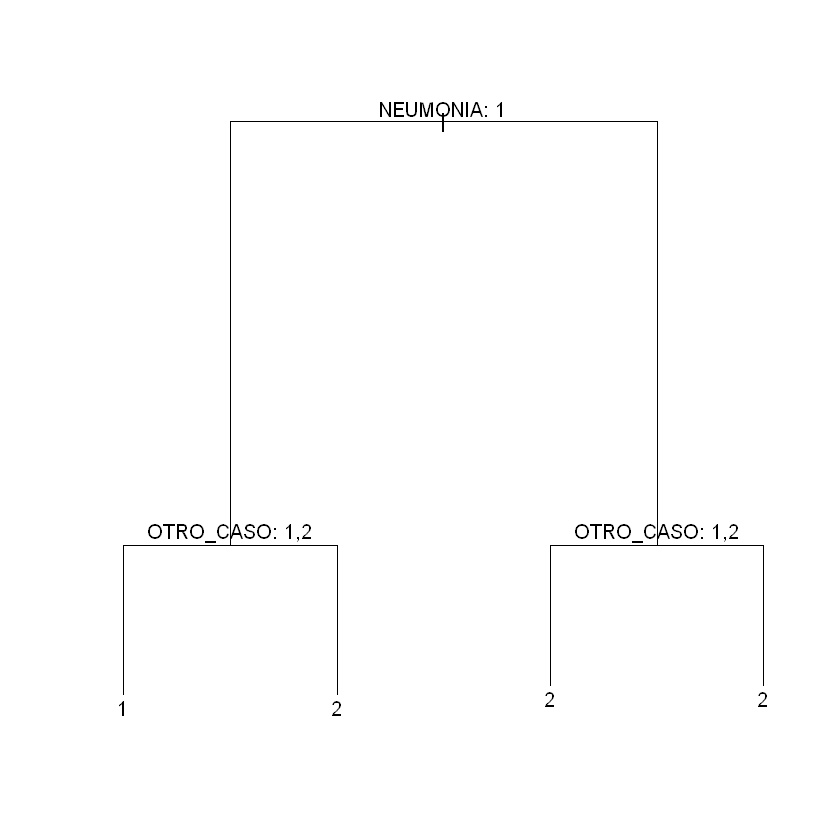

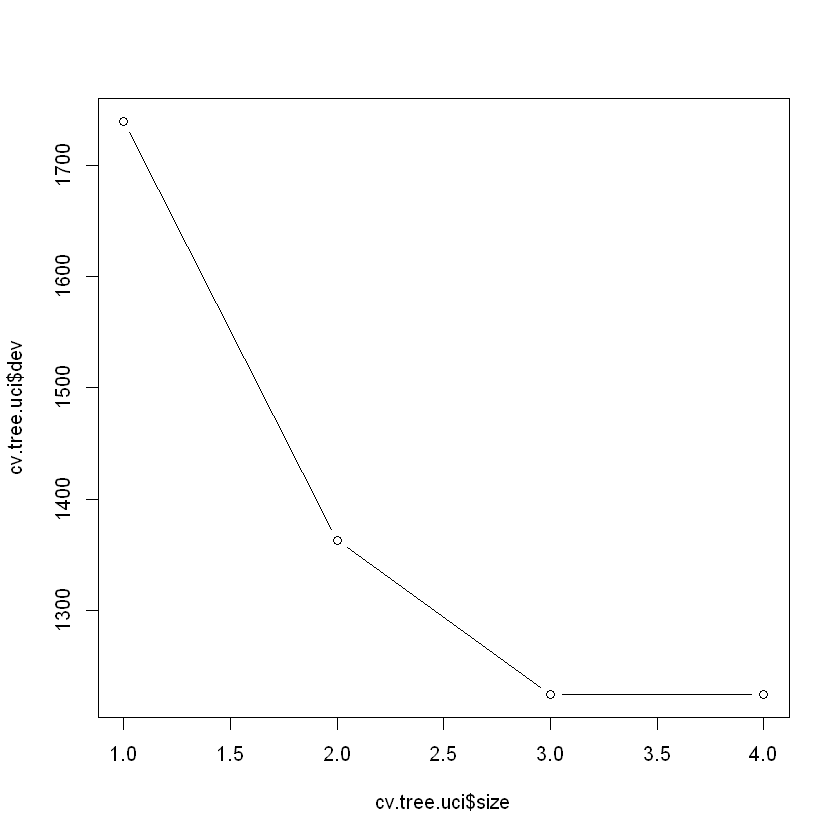

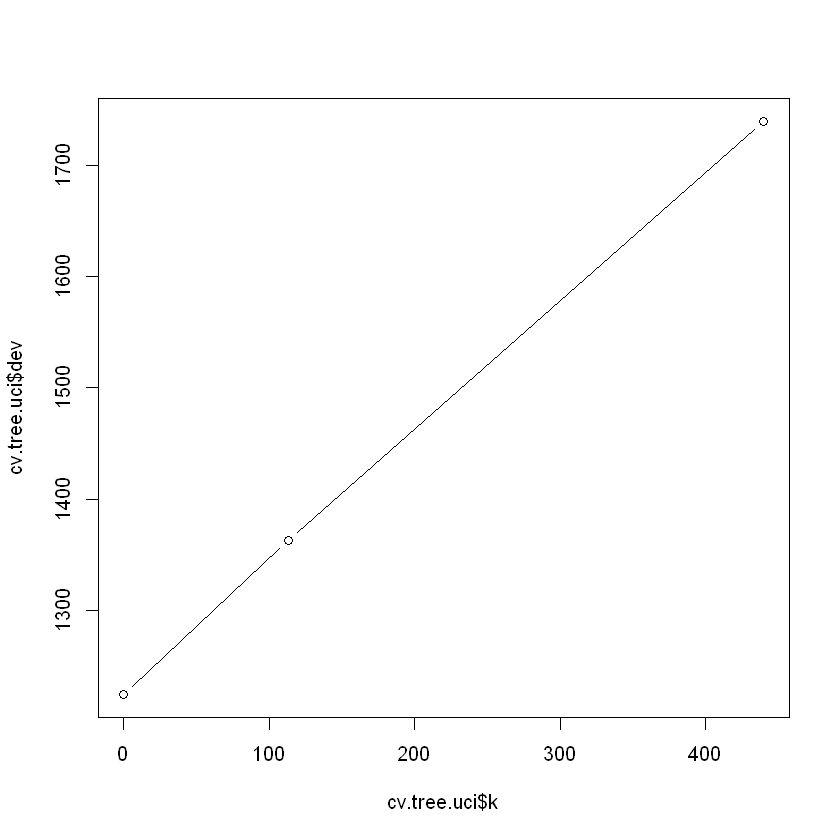

In [25]:
#########decision tree#####
tree.UCI = tree(UCI~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO ,data = Train)
summary(tree.UCI)
plot(tree.UCI)
text(tree.UCI, pretty=0)
tree.pred = predict(tree.UCI, Test, type="class")
table(tree.pred,Test$UCI)
mean(tree.pred==Test$UCI)

cv.tree.uci = cv.tree(tree.UCI, FUN = prune.misclass)
names(cv.tree.uci)
cv.tree.uci
plot(cv.tree.uci$size, cv.tree.uci$dev,type="b")
plot(cv.tree.uci$k,cv.tree.uci$dev,type="b")


[1] 0.6626429

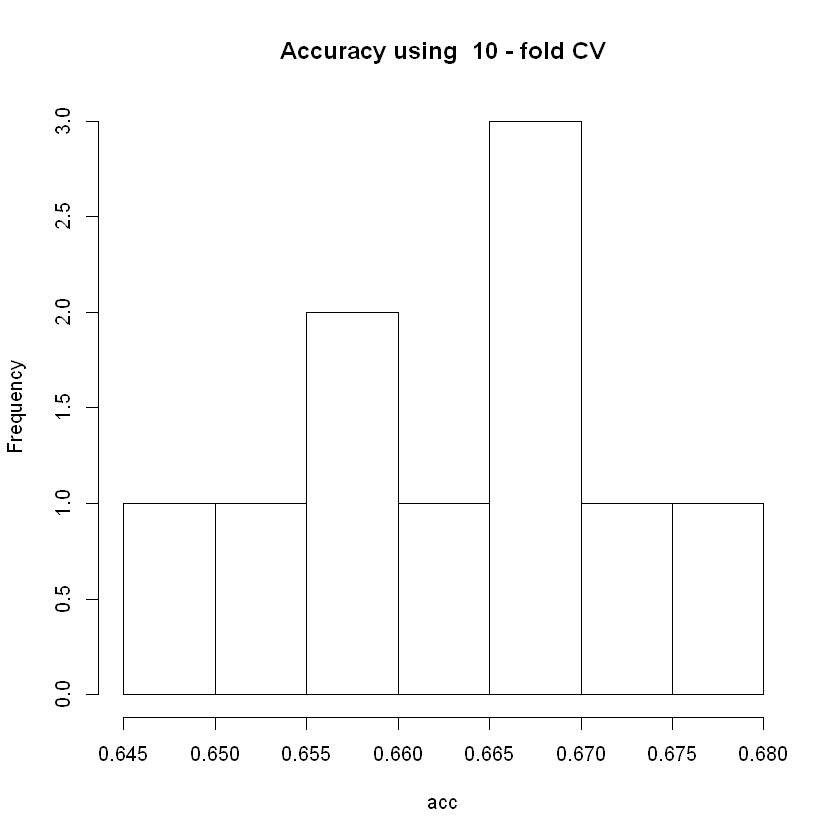

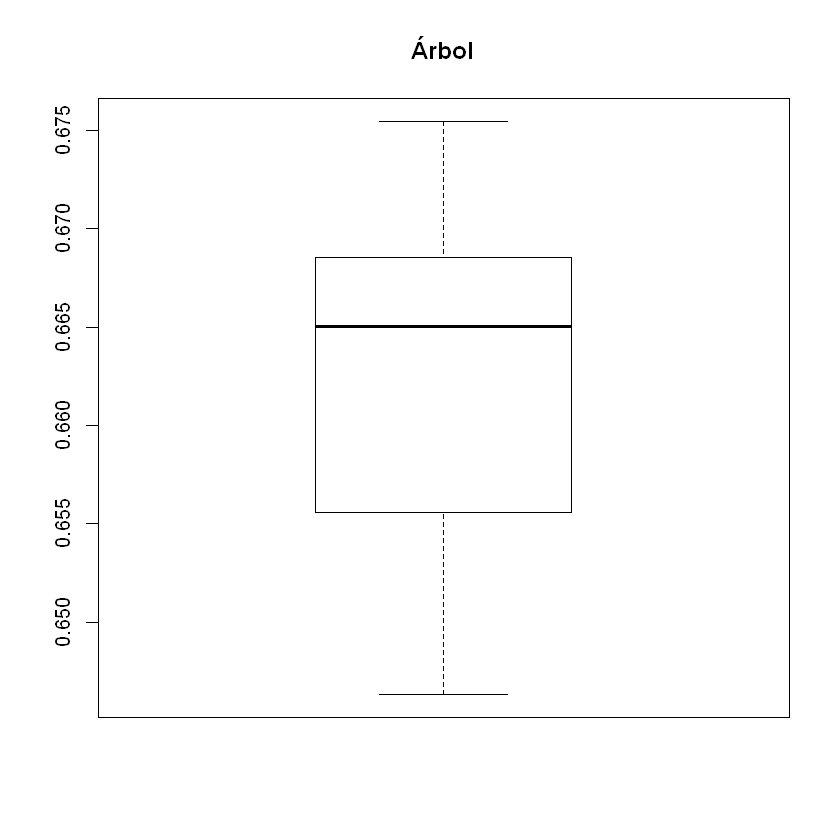

In [26]:
######kfolds tree
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg =tree(UCI~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO ,data = train)
  
  y = test$UCI
  res = predict(reg, test, type="class") #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="Árbol",xlabel="Precisión")
